In [334]:
# Importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [335]:
# Loading and reading data
file_path=r"D:\personalProject\simpleLinearRegression\data\regression-one.csv"
data=pd.read_csv(file_path)
df=pd.DataFrame(data)

In [336]:
# Set display option
pd.set_option("display.max_columns", None)

#### Dataset Overview and Inspectation

In [337]:
# Reading the first 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [338]:
# Getting the dataframe shape
print(f"Dataframe shape(rows, columns): {df.shape}")

Dataframe shape(rows, columns): (2938, 22)


In [339]:
# Getting the dataframe basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [340]:
# Standardization the dataframe column names
df.columns=df.columns.str.lower().str.replace(" ", "_")

In [341]:
# Getting column names
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [342]:
# Changing data types
df["year"]=df["year"].astype("str")

In [343]:
def identify_dtypes(df):
    """Identify and group columns by their data types."""
    cat_cols   = df.select_dtypes(include=["object", "category"]).columns
    num_cols   = df.select_dtypes(include=["int64", "float64"]).columns
    
    print(f"Categorical columns: {len(list(cat_cols))}\n", list(cat_cols))
    print("="*50)
    print(f"Numerical columns:{len(list(num_cols))}\n", list(num_cols))
    print("="*150)

identify_dtypes(df)

Categorical columns: 3
 ['country', 'year', 'status']
Numerical columns:19
 ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [344]:
# Missing Columns
null_cols = df.columns[df.isna().any()]
print(f"Number of columns having any missing values: {len(null_cols)}\n")
print(f"Contained Null Values: \n{null_cols}\n")

Number of columns having any missing values: 14

Contained Null Values: 
Index(['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi',
       'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population',
       'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')



In [345]:
# Missing Values Analysis
missing_count = df.isna().sum()
missing_pct = df.isna().mean().mul(100).round(4)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_pct})
print("Missing Values Summary: ")
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by= 'Missing Count', ascending=False))

Missing Values Summary: 
                                 Missing Count  Missing Percentage
population                                 652             22.1920
hepatitis_b                                553             18.8223
gdp                                        448             15.2485
total_expenditure                          226              7.6923
alcohol                                    194              6.6031
income_composition_of_resources            167              5.6841
schooling                                  163              5.5480
bmi                                         34              1.1572
thinness_1-19_years                         34              1.1572
thinness_5-9_years                          34              1.1572
polio                                       19              0.6467
diphtheria                                  19              0.6467
life_expectancy                             10              0.3404
adult_mortality                      

In [346]:
# Checking duplicates
print(f"Number of duplicated records: {df.duplicated().sum()}")

Number of duplicated records: 0


In [347]:
# Detecting outliers for all numeric columns using IQR
def detect_outliers_all(dataframe):
    """
    Detect outliers for all numeric columns in a DataFrame using the IQR method.
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
    Returns:
        outlier_summary (dict): Dictionary with column names as keys and number of outliers as values.
        outlier_details (dict): Dictionary with column names as keys and DataFrame of outliers as values.
    """
    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    outlier_summary = {}
    outlier_details = {}

    for col in numeric_columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        outlier_summary[col] = outliers.shape[0]
        outlier_details[col] = outliers

        # Print details only if outliers exist
        if outliers.shape[0] > 0:
            print(f"{col}: ")
            print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
            print(f"  Number of Outliers: {outliers.shape[0]}")
            print("-" * 50)

    return outlier_summary, outlier_details

# Example usage
outlier_counts, outlier_data = detect_outliers_all(df)

life_expectancy: 
  Lower Bound: 44.20, Upper Bound: 94.60
  Number of Outliers: 10
--------------------------------------------------
adult_mortality: 
  Lower Bound: -157.00, Upper Bound: 459.00
  Number of Outliers: 82
--------------------------------------------------
infant_deaths: 
  Lower Bound: -33.00, Upper Bound: 55.00
  Number of Outliers: 315
--------------------------------------------------
percentage_expenditure: 
  Lower Bound: -650.59, Upper Bound: 1096.81
  Number of Outliers: 389
--------------------------------------------------
hepatitis_b: 
  Lower Bound: 47.00, Upper Bound: 127.00
  Number of Outliers: 254
--------------------------------------------------
measles: 
  Lower Bound: -540.38, Upper Bound: 900.62
  Number of Outliers: 542
--------------------------------------------------
under-five_deaths: 
  Lower Bound: -42.00, Upper Bound: 70.00
  Number of Outliers: 394
--------------------------------------------------
polio: 
  Lower Bound: 49.50, Upper Bound:

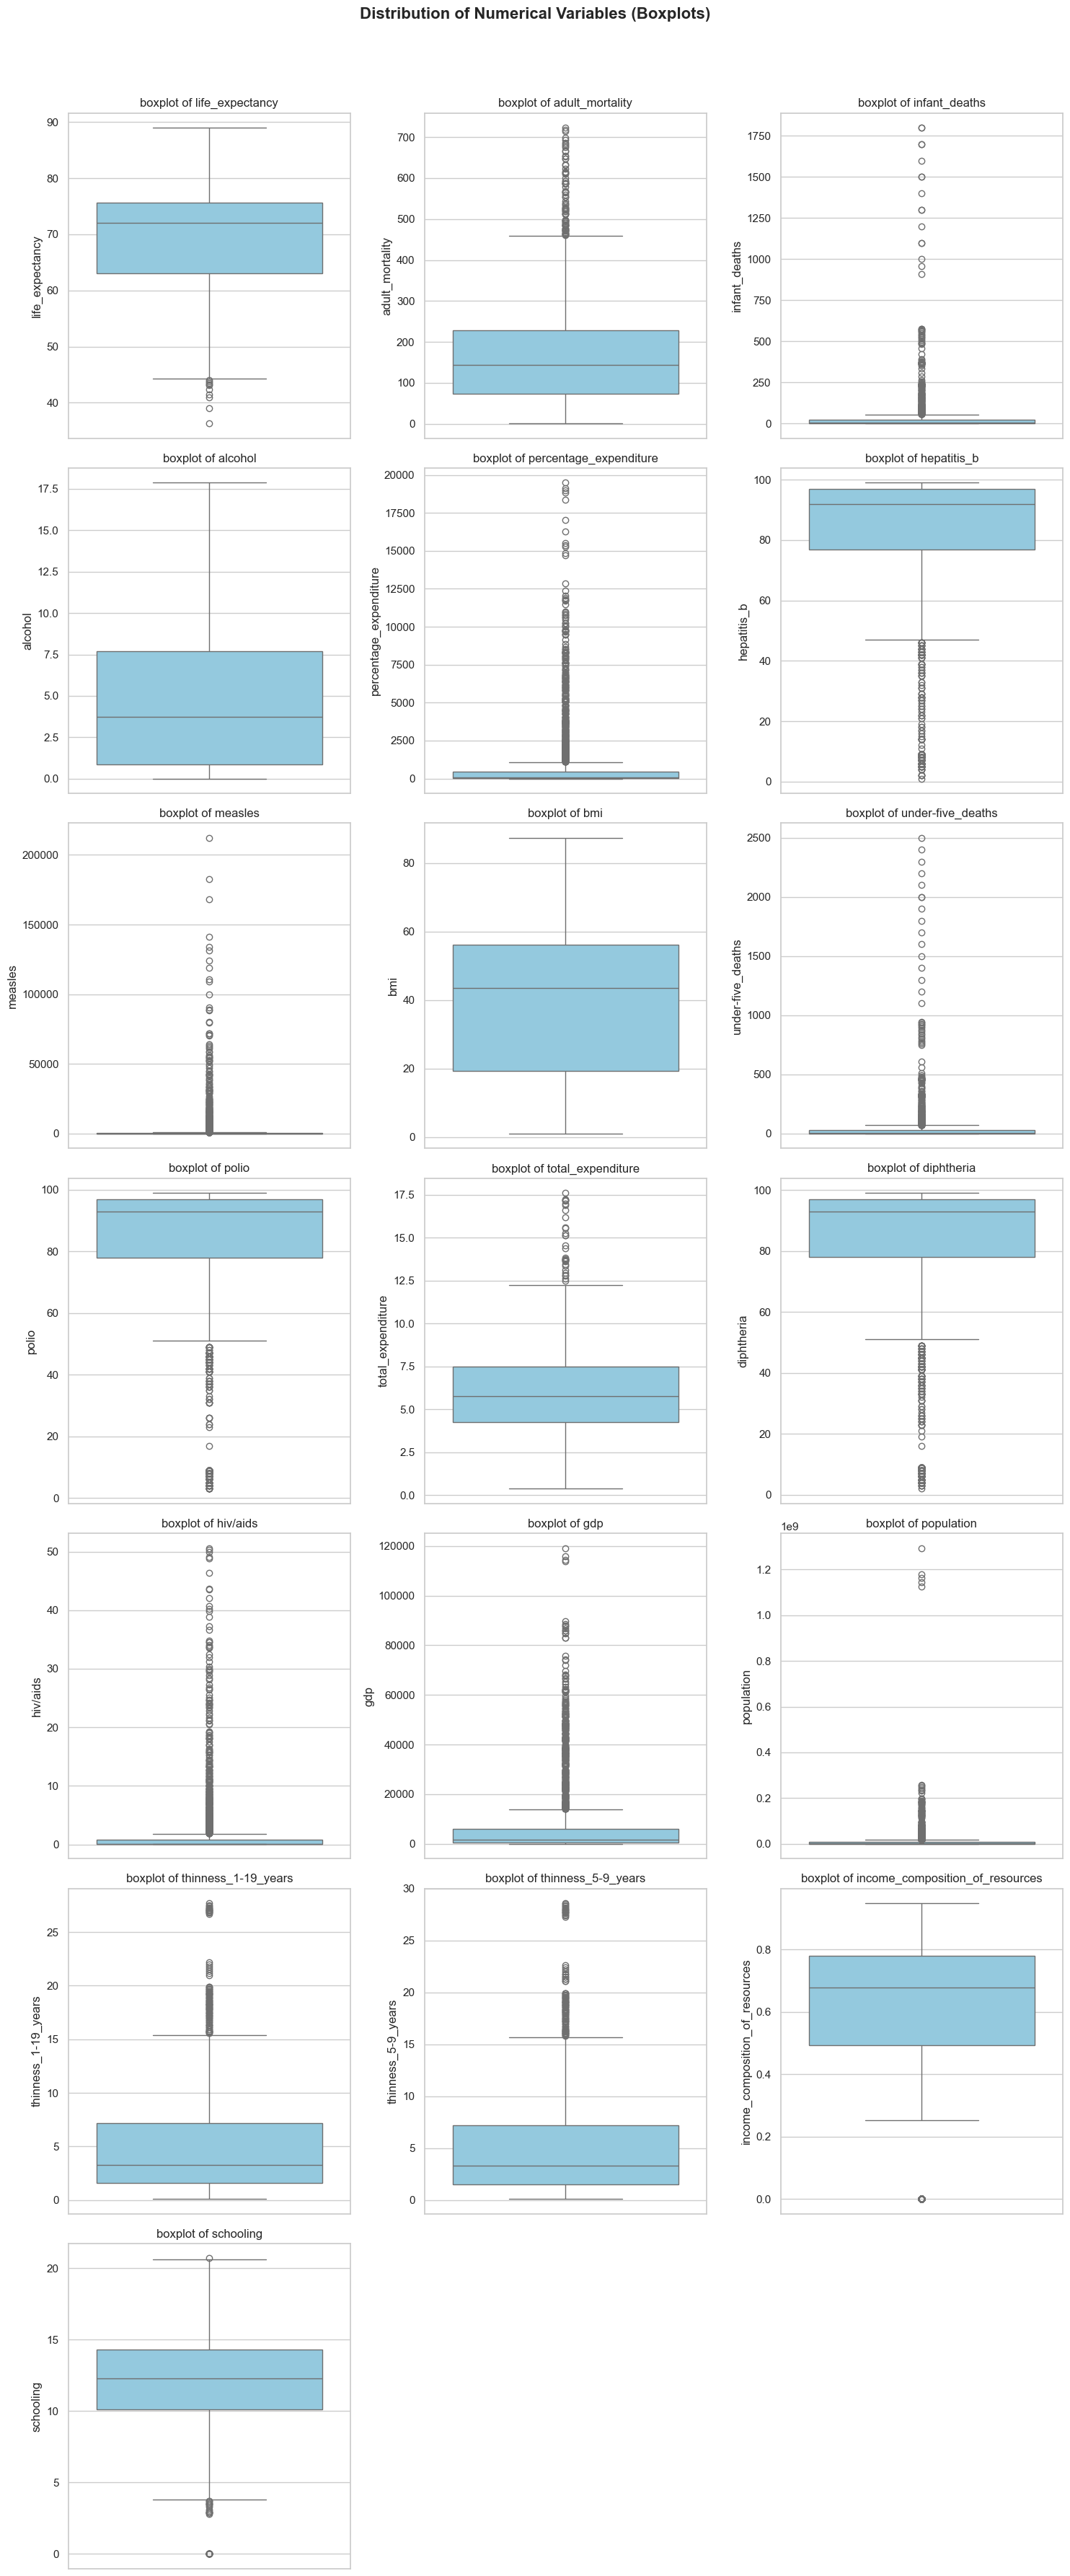

In [348]:
# Checking outliers for all numeric columns
sns.set(style="whitegrid")
def plot_box(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    num_plots = len(num_cols)
    num_cols_plots = 3  
    num_rows_plots = (num_plots // num_cols_plots) + (num_plots % num_cols_plots > 0)
    
    fig, axes = plt.subplots(num_rows_plots, num_cols_plots, figsize=(15, num_rows_plots * 5))
    axes = axes.flatten()  

    for i, col in enumerate(num_cols):
        sns.boxplot(df[col], ax=axes[i], color="skyblue")
        axes[i].set_title(f'boxplot of {col}')

    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    # Add main title
    fig.suptitle("Distribution of Numerical Variables (Boxplots)", fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

plot_box(df)

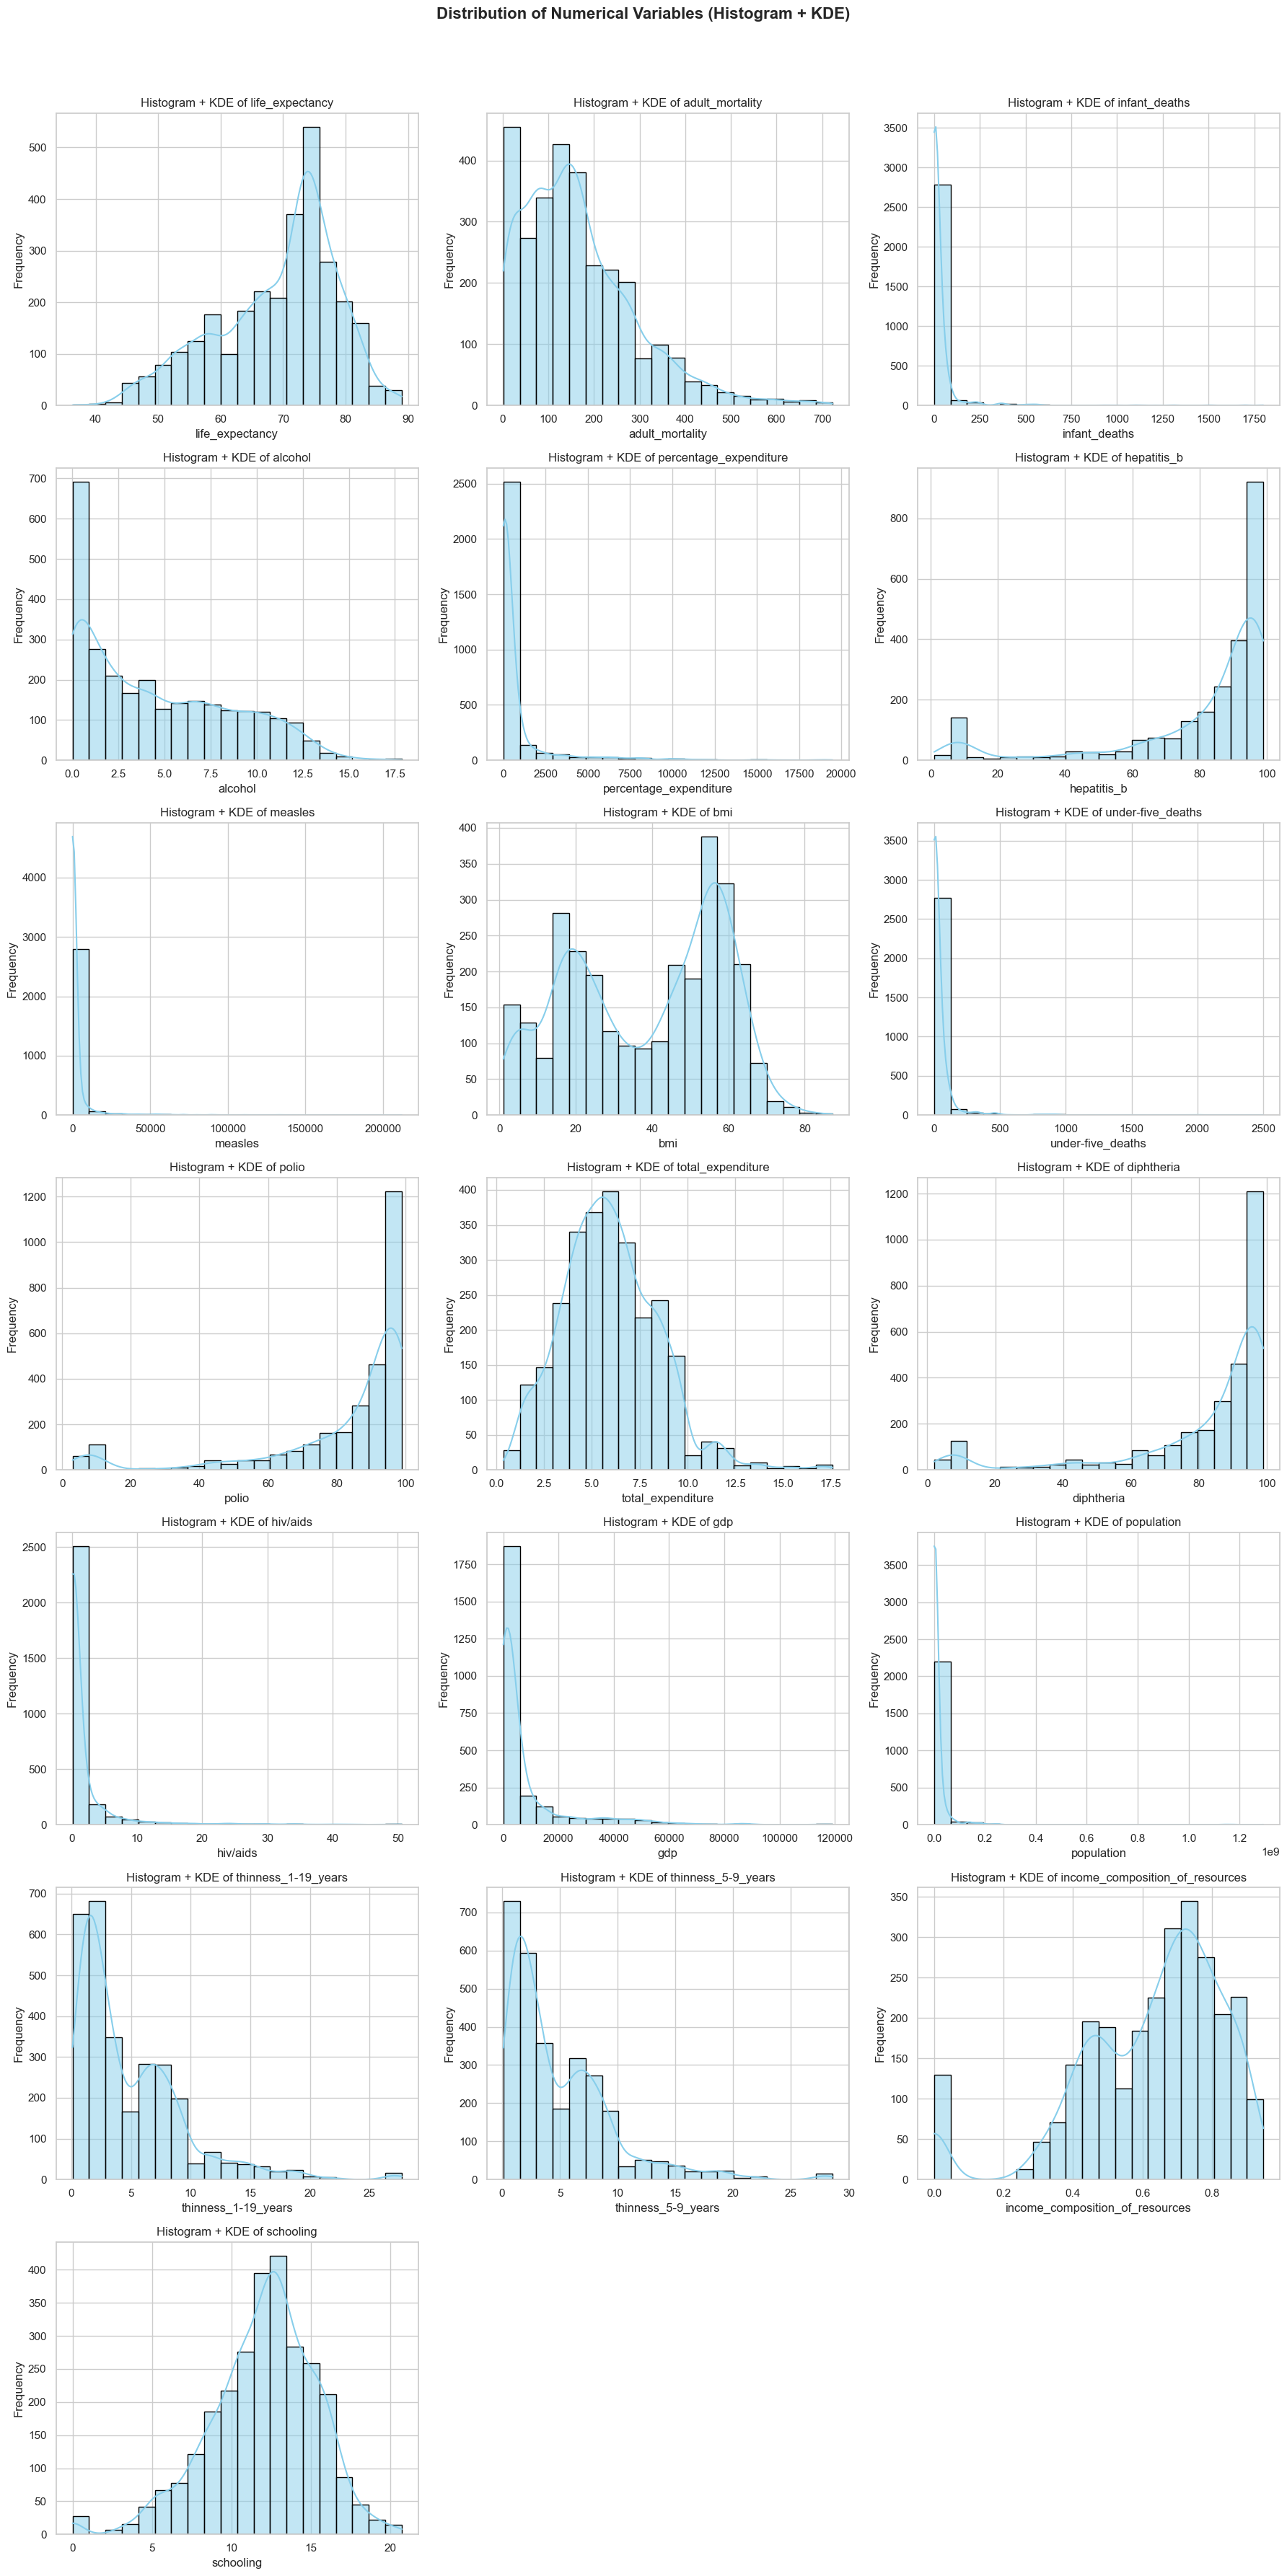

In [349]:
# Select numerical columns
num_cols = df.select_dtypes(include='number').columns
n_cols = len(num_cols)

# Determine subplot grid size
n_rows = (n_cols // 3) + (n_cols % 3 > 0)  # 3 plots per row

# Create figure and axes
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot histograms with KDE
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"Histogram + KDE of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title
fig.suptitle("Distribution of Numerical Variables (Histogram + KDE)", fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### Data Cleaning

In [350]:
# copy dataset
df_cleaned=df.copy()

In [351]:
cols_to_impute= df_cleaned[["population", "hepatitis_b", "gdp", "total_expenditure", "alcohol", "income_composition_of_resources", "schooling"]]

for col in cols_to_impute:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

In [352]:
df_cleaned.dropna(inplace=True)

In [353]:
# Checking is there any missing values
print(f"Total missing values: {df_cleaned.isna().sum().sum()}")

Total missing values: 0


In [354]:
def cap_outliers_iqr(df, factor=1.5):
    df_capped = df.copy()
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        df_capped[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df_capped

df_cleaned = cap_outliers_iqr(df_cleaned)

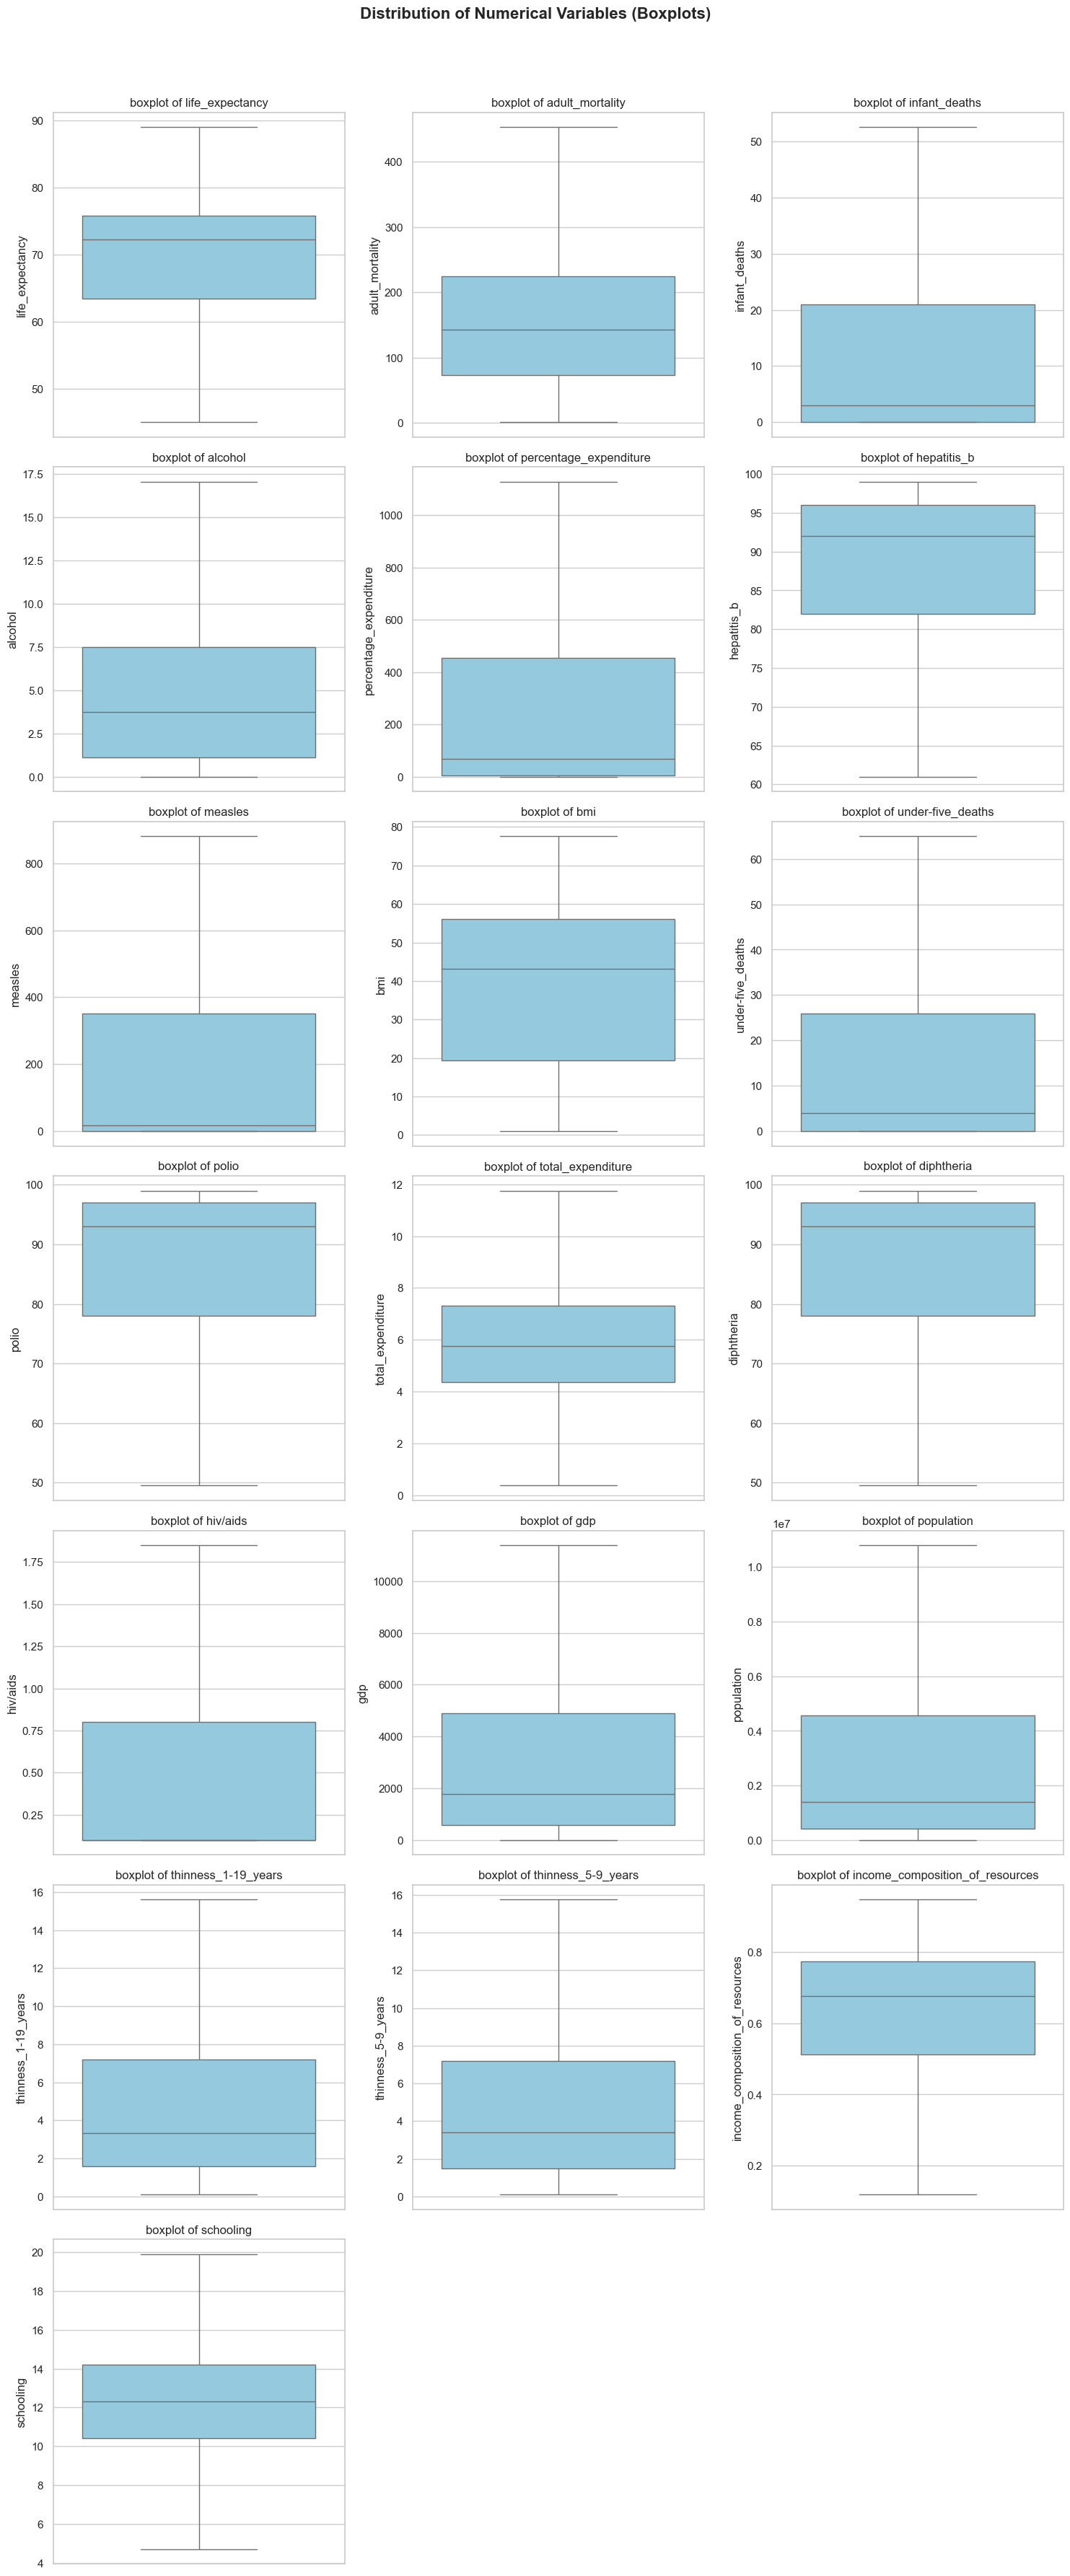

In [355]:
# Checking outliers for all numeric columns
sns.set(style="whitegrid")
def plot_box(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    num_plots = len(num_cols)
    num_cols_plots = 3  
    num_rows_plots = (num_plots // num_cols_plots) + (num_plots % num_cols_plots > 0)
    
    fig, axes = plt.subplots(num_rows_plots, num_cols_plots, figsize=(15, num_rows_plots * 5))
    axes = axes.flatten()  

    for i, col in enumerate(num_cols):
        sns.boxplot(df[col], ax=axes[i], color="skyblue")
        axes[i].set_title(f'boxplot of {col}')

    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    # Add main title
    fig.suptitle("Distribution of Numerical Variables (Boxplots)", fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

plot_box(df_cleaned)

In [356]:
print(f"Dataset shape(rows, columns) after cleanining: {df_cleaned.shape}")

Dataset shape(rows, columns) after cleanining: (2888, 22)


#### Exploratory Data Analysis

In [357]:
df_cleaned.select_dtypes(include="number").describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
life_expectancy,2888.00,69.36,9.46,44.99,63.48,72.20,75.80,89.00
adult_mortality,2888.00,160.43,114.96,1.00,73.00,143.00,225.00,453.00
infant_deaths,2888.00,13.13,18.37,0.00,0.00,3.00,21.00,52.50
alcohol,2888.00,4.59,3.93,0.01,1.11,3.75,7.49,17.06
percentage_expenditure,2888.00,291.62,400.13,0.00,5.05,67.69,454.42,1128.48
hepatitis_b,2888.00,86.99,12.33,61.00,82.00,92.00,96.00,99.00
measles,2888.00,228.99,345.82,0.00,0.00,17.00,352.25,880.62
bmi,2888.00,38.22,19.96,1.00,19.30,43.25,56.10,77.60
under-five_deaths,2888.00,16.97,23.61,0.00,0.00,4.00,26.00,65.00
polio,2888.00,85.39,15.81,49.50,78.00,93.00,97.00,99.00


In [358]:
# Checking the correlation between numerical variables
df_cleaned.corr(numeric_only=True).round(2)

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.00,-0.69,-0.57,0.39,0.49,0.26,-0.34,0.57,-0.60,0.57,0.21,0.58,-0.80,0.53,-0.08,-0.52,-0.51,0.73,0.74
adult_mortality,-0.69,1.00,0.38,-0.20,-0.32,-0.19,0.21,-0.40,0.40,-0.35,-0.12,-0.35,0.60,-0.34,0.08,0.35,0.35,-0.47,-0.45
infant_deaths,-0.57,0.38,1.00,-0.33,-0.35,-0.30,0.58,-0.46,0.99,-0.43,-0.16,-0.42,0.42,-0.36,0.35,0.44,0.45,-0.41,-0.50
alcohol,0.39,-0.20,-0.33,1.00,0.40,0.14,-0.19,0.32,-0.34,0.26,0.31,0.27,-0.20,0.40,0.00,-0.44,-0.43,0.45,0.52
percentage_expenditure,0.49,-0.32,-0.35,0.40,1.00,0.13,-0.19,0.33,-0.36,0.26,0.19,0.26,-0.29,0.85,-0.01,-0.33,-0.33,0.51,0.53
hepatitis_b,0.26,-0.19,-0.30,0.14,0.13,1.00,-0.22,0.16,-0.30,0.51,0.08,0.54,-0.20,0.17,-0.13,-0.12,-0.12,0.22,0.24
measles,-0.34,0.21,0.58,-0.19,-0.19,-0.22,1.00,-0.32,0.58,-0.32,-0.16,-0.31,0.23,-0.21,0.24,0.36,0.37,-0.24,-0.33
bmi,0.57,-0.40,-0.46,0.32,0.33,0.16,-0.32,1.00,-0.48,0.34,0.22,0.34,-0.49,0.38,-0.06,-0.55,-0.56,0.52,0.56
under-five_deaths,-0.60,0.40,0.99,-0.34,-0.36,-0.30,0.58,-0.48,1.00,-0.44,-0.16,-0.43,0.46,-0.38,0.35,0.45,0.47,-0.44,-0.53
polio,0.57,-0.35,-0.43,0.26,0.26,0.51,-0.32,0.34,-0.44,1.00,0.16,0.84,-0.47,0.32,-0.09,-0.29,-0.29,0.47,0.50


In [359]:
# Checking the correlation between "life-expectancy" and others numerical variables
corr= df_cleaned.corr(numeric_only=True, method="pearson")[["life_expectancy"]].sort_values("life_expectancy", ascending=False)
corr

,life_expectancy
life_expectancy,1.000000
schooling,0.740417
income_composition_of_resources,0.731228
diphtheria,0.575273
polio,0.569513
bmi,0.568239
gdp,0.525138
percentage_expenditure,0.486043
alcohol,0.392165
hepatitis_b,0.255425


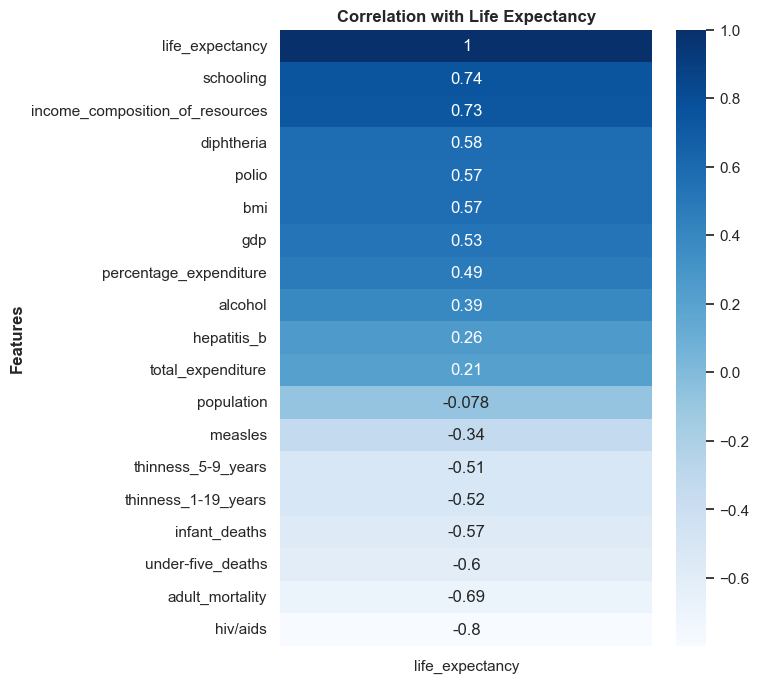

In [360]:
plt.figure(figsize=(6,8))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation with Life Expectancy", fontweight="bold")
plt.ylabel("Features", fontweight="bold")
plt.show()

#### Simple Linear Regression

In [361]:
# Setting dependent and independent variable
X=df_cleaned["schooling"]
y=df_cleaned["life_expectancy"]

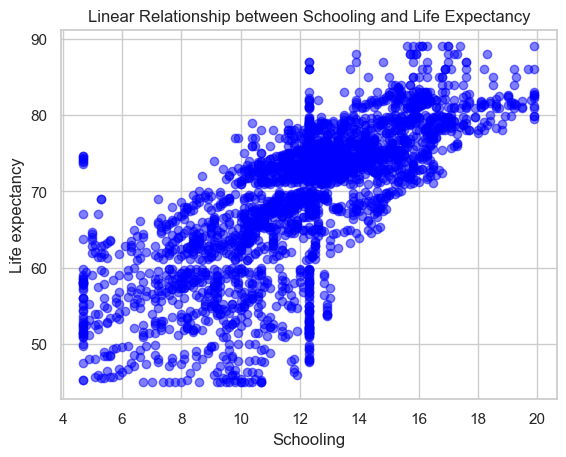

In [362]:
# Checking for Linearity
plt.scatter(X, y, marker="o", color= "blue", alpha=0.5)
plt.title("Linear Relationship between Schooling and Life Expectancy")
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.show()

In [363]:
# Computing pearson's correlation coefficient
import scipy.stats as sc
r = sc.pearsonr(X, y)
print(f"Pearson r = {r[0]:.4f} with p-value = {r[1]:.4f}")

Pearson r = 0.7404 with p-value = 0.0000


In [364]:
# Fitting the regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\n --- Regression Model Summary ---")
print(model.summary())


 --- Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     3502.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:05:39   Log-Likelihood:                -9439.8
No. Observations:                2888   AIC:                         1.888e+04
Df Residuals:                    2886   BIC:                         1.890e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.

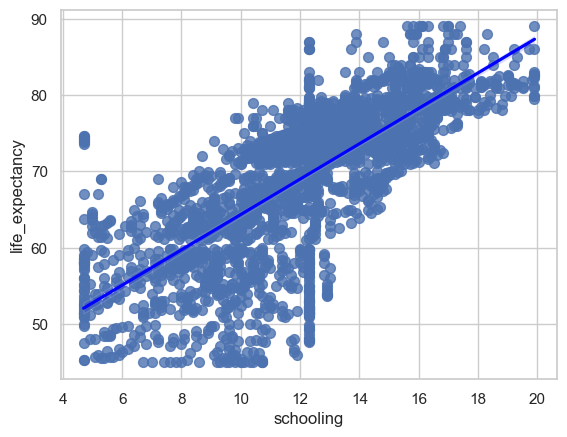

In [365]:
sns.regplot(x='schooling', y='life_expectancy', data=df_cleaned, ci=95, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.show()

In [366]:
# Model ရဲ့ Parameters များကို ထုတ်ယူခြင်း
intercept = model.params['const']
slope = model.params['schooling']

print(f"\n--- Model အဓိပ္ပာယ်ဖွင့်ဆိုချက် ---\n")
print(f"Regression Equation: Life Expectancy = {intercept:.2f} + {slope:.2f} * Schooling")

# Slope ကို ရှင်းပြခြင်း
print(f"Slope ({slope:.2f}): Schooling တန်ဖိုး 1 (ဥပမာ 2.29 မှ 3.29 သို့) တိုးလာပါက ခန့်မှန်းသက်တမ်းဟာ ပျမ်းမျှအားဖြင့် {slope:.2f} နှစ် တိုးလာမည်။")

# ခန့်မှန်းမှု ဥပမာ: Schooling = 11 ရှိတဲ့ နိုင်ငံတစ်နိုင်ငံအတွက် ခန့်မှန်းချက်
icor_new = 11
new_X = pd.DataFrame({'const': [1], 'schooling': [icor_new]})
predicted_life_exp = model.predict(new_X)[0]

print(f"\nSchooling တန်ဖိုး {icor_new} ရှိသော နိုင်ငံတစ်နိုင်ငံအတွက် ခန့်မှန်း Life Expectancy: {predicted_life_exp:.2f} နှစ်")


--- Model အဓိပ္ပာယ်ဖွင့်ဆိုချက် ---

Regression Equation: Life Expectancy = 41.19 + 2.32 * Schooling
Slope (2.32): Schooling တန်ဖိုး 1 (ဥပမာ 2.29 မှ 3.29 သို့) တိုးလာပါက ခန့်မှန်းသက်တမ်းဟာ ပျမ်းမျှအားဖြင့် 2.32 နှစ် တိုးလာမည်။

Schooling တန်ဖိုး 11 ရှိသော နိုင်ငံတစ်နိုင်ငံအတွက် ခန့်မှန်း Life Expectancy: 66.69 နှစ်


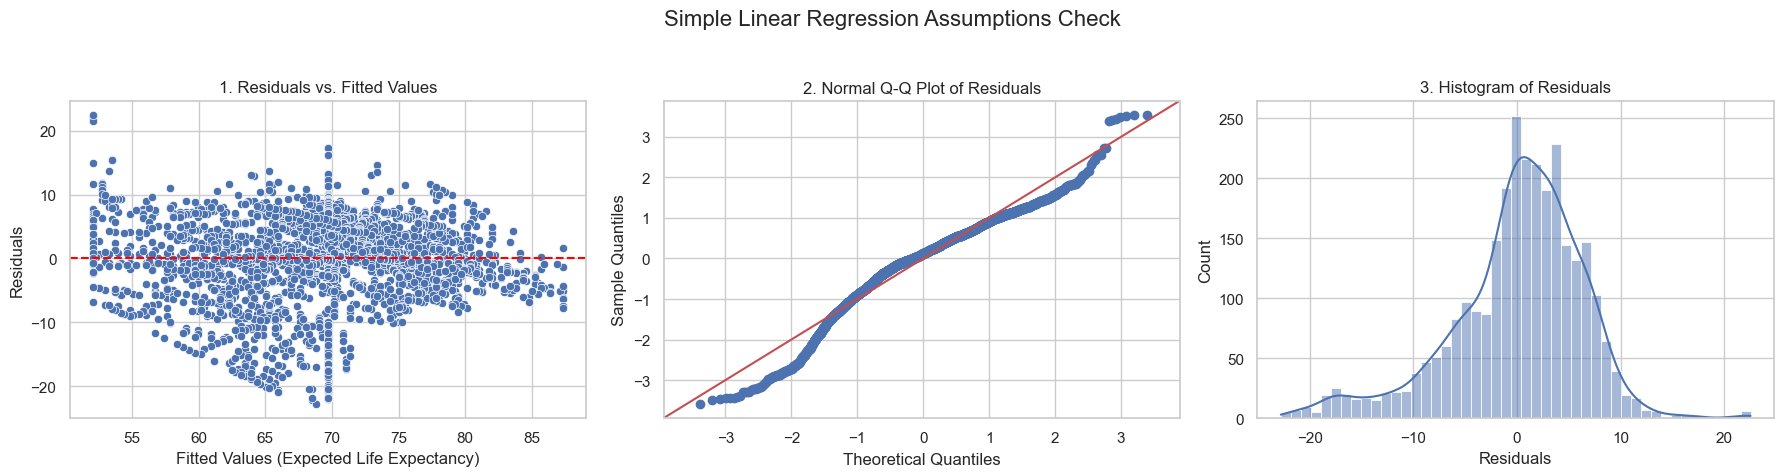

In [367]:
# Model ရဲ့ Residuals များကို ထုတ်ယူခြင်း
residuals = model.resid
fitted_values = model.fittedvalues

# ပုံများအတွက် နေရာပြင်ဆင်ခြင်း
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Simple Linear Regression Assumptions Check', fontsize=16)

# --------------------------------------------------------
# Linearity နှင့် Homoscedasticity စစ်ဆေးခြင်း
# Residuals vs. Fitted Values Plot
# ----------------------------------------
sns.scatterplot(x=fitted_values, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('1. Residuals vs. Fitted Values')
axes[0].set_xlabel('Fitted Values (Expected Life Expectancy)')
axes[0].set_ylabel('Residuals')

# --------------------------------------------------------
# Normality of Residuals စစ်ဆေးခြင်း
# Q-Q Plot (Quantile-Quantile Plot)
# ---------------------------------
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('2. Normal Q-Q Plot of Residuals')

# --------------------------------------------------------
# Normality of Residuals စစ်ဆေးခြင်း
# Histogram
# --------------------------------
sns.histplot(residuals, kde=True, ax=axes[2])
axes[2].set_title('3. Histogram of Residuals')
axes[2].set_xlabel('Residuals')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Simple Linear Regression: Life Expectancy vs Schooling

Objective: To examine how education (schooling years) affects life expectancy.

Data: WHO Life Expectancy dataset (2,938 observations, 22 features)

Method: Ordinary Least Squares (OLS)

Result:

β₀ (Intercept): 41.19

β₁ (Schooling): 2.32

R² = 0.55

p < 0.00

Interpretation: Every extra year of schooling is associated with an increase of about 2.32 years in life expectancy.

Conclusion: Education strongly influences life expectancy across countries.